# <span style="color:#54B1FF">Preprocessing:</span> &nbsp; <span style="color:#1B3EA9"><b>Scaling</b></span>

<br>

**Scaling** refers to the transformation of a range of data. For example, if the data originally range from 100 to 1000, one could scale them to a range of 0 to 1. This type of scaling is important for some machine learning (ML) algorithms, which expect data to lie within a certain range of values.

As a practical example to demonstrate the importance of scaling, consider a self-driving car that uses streaming video as an input feature to a machine learning self-driving algorithm.  Imagine that pixel brightness values in the **training set** range from 100 (road) to 255 (bright sun). If the machine learning goal is to follow white markings on the road, the algorithm will likely need to find pixels with a brightness value of about 125. If these data were scaled to the range 0 (minimum brightness) to +1 (maximum brightness) the white-line target brightness value would be about 0.16.

Now imagine that car is on the road in real-life, and using a real-time video stream as the **test set**. Imagine that the camera malfunctions, and that a few video pixels return values of 10,000. If you scale these new data to a range of 0 to +1, the new white-line target brightness value would be about 0.003. This would almost certainly disrput the self-driving algorithm, and possibly result in a crash or worse.

This example, while simple, demonstrates the importance of being able to **apply a specific processing procedure to the test set**, regardless of the nature of the test set.

We shall first consider simple data scaling, then we will consider how to apply a specific scaling to the test set.

<br>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing



<br>
<br>

___

## Scaling basics



In [2]:

np.random.seed(0)

x    = [50, 500, 1000] + 100 * np.random.rand(8, 3)

print( x )


[[ 104.88135039  571.51893664 1060.27633761]
 [ 104.4883183   542.36547993 1064.58941131]
 [  93.75872113  589.17730008 1096.36627605]
 [  88.34415188  579.17250381 1052.88949198]
 [ 106.80445611  592.55966383 1007.10360582]
 [  58.71292997  502.02183974 1083.26198455]
 [ 127.81567509  587.00121482 1097.86183422]
 [ 129.91585642  546.14793623 1078.05291763]]


In [3]:

x_scaled = preprocessing.scale(x)

print( x_scaled )


[[ 0.1431378   0.2648207  -0.2647958 ]
 [ 0.12463907 -0.72837546 -0.10778448]
 [-0.38036788  0.86640351  1.04900711]
 [-0.6352139   0.52556142 -0.53370342]
 [ 0.23365209  0.98163344 -2.20047352]
 [-2.02985836 -2.10279732  0.571964  ]
 [ 1.22258127  0.79226893  1.10345078]
 [ 1.32142992 -0.59951523  0.38233533]]


<br>
After scaling, the mean and variance of each feature are 0 and 1, respectively, just like the Standard Normal distribution:

<br>

In [4]:

print( np.around( x_scaled.mean(axis=0) , 5 ) )

print( x_scaled.std(axis=0) )


[-0. -0. -0.]
[1. 1. 1.]


<br>

However, this does NOT mean that the data are now normally distributed. Note that the code above uses `np.random.rand` (i.e., the uniform distribution) and not `np.random.randn` (i.e., the standard normal distribution).

This can be seen more clearly for a dataset with many more observations, let's try 1000 observations:

<br>

[-0. -0.  0.]
[1. 1. 1.]


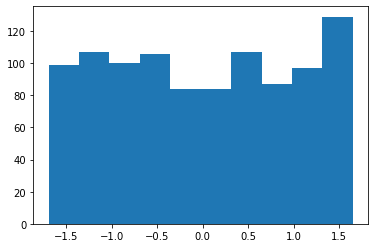

In [5]:

x    = [50, 500, 1000] + 100 * np.random.rand(1000, 3)
x_scaled = preprocessing.scale(x)

print( np.around( x_scaled.mean(axis=0) , 5 ) )
print( x_scaled.std(axis=0) )

plt.figure()
plt.hist( x_scaled[:,0] )
plt.show()


<br>

Even though the data now have a mean of zero and a standard deviation of 1, they are clearly **not** normally distributed.

<br>


<br>
<br>

___

## Scaling training and test sets 

As mentioned at the top of this notebook, it can occasionally be important to scale the **test set** data in exactly the same manner in which the **training set** was scaled.

**sklearn** provides a variety of tools to ensure that preprocessing routines are applied equivalently to the training and test sets. Below is an example.

<br>

First let's define one training set and one test set:

<br>

In [6]:

np.random.seed(0)

x_train  = np.random.rand(10, 2)
x_test   = np.random.rand(3, 2)

print( x_test )


[[0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]]


<br>

One could separately scaled the training and test sets like this:

<br>

In [7]:
x_train_scaled  = preprocessing.scale(x_train)
x_test_scaled   = preprocessing.scale(x_test)

print( x_test_scaled )

[[ 1.29846443  0.83408861]
 [-0.16395642  0.57200683]
 [-1.13450801 -1.40609544]]


<br>

Or one could scale the training set, then use the results to scale the test set, like this:

<br>


In [8]:

scaler        = preprocessing.StandardScaler()
scaler.fit(x_train)

x_test_scaled = scaler.transform( x_test )

print( x_test_scaled )


[[ 1.60475663  0.62226019]
 [-0.20700717  0.54824228]
 [-1.40940402 -0.0104192 ]]


<br>

These results are not very different from using `preprocessing.scale`.

(Note that `scaler` means "an object that scales data", and not "scalar".)


<br>
<br>

If the `preprocessing.scale` and `preprocessing.StandardScaler` approaches have produced similar results, why does this matter?

It matters because the test_set might not always behave as expected. For example, similar to the self-driving car example above, imagine that one of the **test set** features is strange, with values much higher than the expected maximum of 1:

<br>

In [9]:

x_test[:,1] += 10

print( x_test )


[[ 0.97861834 10.79915856]
 [ 0.46147936 10.78052918]
 [ 0.11827443 10.63992102]]


<br>

Now there will be a much bigger difference between the two methods of scaling:

<br>

In [10]:

x_test_scaled_0   = preprocessing.scale(x_test)
x_test_scaled_1   = scaler.transform( x_test )

print( x_test_scaled_0 )
print()
print( x_test_scaled_1 )

[[ 1.29846443  0.83408861]
 [-0.16395642  0.57200683]
 [-1.13450801 -1.40609544]]

[[ 1.60475663 40.35405773]
 [-0.20700717 40.28003983]
 [-1.40940402 39.72137835]]


<br>

Note that `scaler` has kept the good feature (the first column of data) exactly like before, despite the corrputed second feature.

In contrast, `preprocessing.scale` has distorted both features.

While this example is simple, it illustrates an important point:

When applying various data preprocessing routines, you must understand and justify how those preprocessing routines should be applied to the test set.